In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_excel('Airline.xls')
x = df['Passengers']

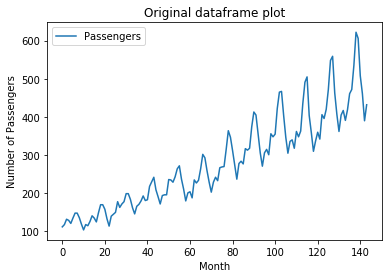

In [2]:
"""Lets plot our time series"""
plt.figure()
plt.plot(x, label='Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Original dataframe plot')
plt.legend(loc='upper left')
plt.show()


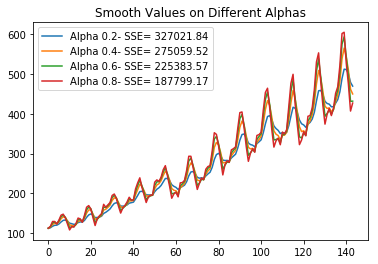

In [3]:
#Create a model and apply simple exponential smoothing

smooth1 = x.ewm(alpha= 0.2, adjust= False).mean()
smooth2 = x.ewm(alpha= 0.4, adjust= False).mean()
smooth3 = x.ewm(alpha= 0.6, adjust= False).mean()
smooth4 = x.ewm(alpha= 0.8, adjust= False).mean()

#Define an error function
def sse(x,y):
    return np.sum(np.power(x-y,2))

#Creating one step SSE error
sse_1= sse(smooth1[:-1], x.values[1:])
sse_2= sse(smooth2[:-1], x.values[1:])
sse_3= sse(smooth3[:-1], x.values[1:])
sse_4= sse(smooth4[:-1], x.values[1:])

plt.figure()
plt.plot(smooth1, label = 'Alpha 0.2- SSE= 327021.84')
plt.plot(smooth2, label = 'Alpha 0.4- SSE= 275059.52')
plt.plot(smooth3, label = 'Alpha 0.6- SSE= 225383.57')
plt.plot(smooth4, label = 'Alpha 0.8- SSE= 187799.17')
plt.legend(loc="upper left")
plt.title("Smooth Values on Different Alphas")
plt.show(block=False)


In [4]:
print("Optimal 1 alpha value is 0.8")
# As can be seen higher values of alpha give more weights to recent observations
# leading to more seasonal patters, whereas lower values of alpha reveals the trend


Optimal 1 alpha value is 0.8


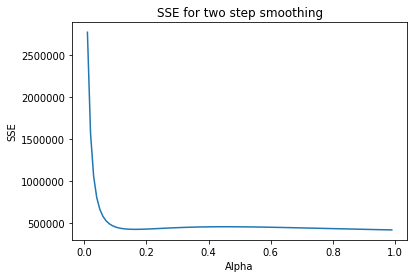

In [5]:
"""Part c of Question 3
#Create a 2 step multi horizon function to find the optimal alpha
"""
def sse(x, y):
    return np.sum(np.power(x - y,2))

alphas = np.arange(0.01,1,0.01)

sse_two = []

for i in alphas:
    smoothed = x.ewm(alpha = i, adjust=False).mean()
    step_sse = sse(smoothed[:-2], x.values[2:])
    sse_two.append(step_sse)


plt.figure()
plt.plot(alphas,sse_two)
plt.title("SSE for two step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.show(block=False)


In [6]:
opt_alpha_index = np.argmin(sse_two)
optimal_alpha_two = alphas[opt_alpha_index]

print (optimal_alpha_two)

print("Optimal Alpha for 2-step forecast {0:.5f} or {1:.2f}"\
      .format(optimal_alpha_two,optimal_alpha_two))



0.99
Optimal Alpha for 2-step forecast 0.99000 or 0.99


In [7]:
optimal_smooth = df.ewm(alpha = 0.99, adjust = False).mean()

y = optimal_smooth['Passengers'].tolist()
#predicted_smooth = optimal_smooth.tolist() 


In [8]:
for i in range(4):
    y.append(y[len(y)-1])

plt.figure()
plt.plot(df, label= "Original Series")                                        
plt.plot(np.arange(143, 148, 1),y[143:],label= "Optimal Step 2 Forecast", c='r')                                                 
plt.ylabel("Number of passengers")
plt.xlabel("Month")
plt.legend(loc="upper left")
plt.title('Optimal step 2 forecast')


Text(0.5,1,'Optimal step 2 forecast')

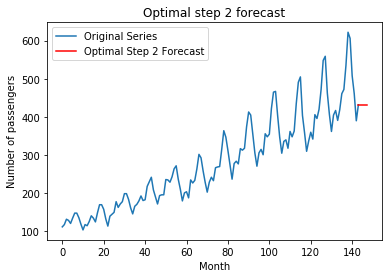

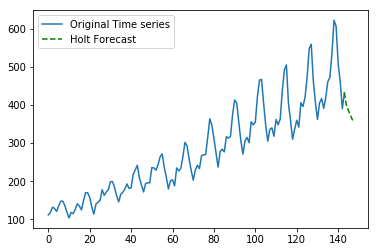

In [9]:
"""Applying Holt winters smoothing to our dataset"""

from holtwinters import linear

x_holt = x.tolist()                                                        
forecast=4                                                                     

smoothed, Y, alpha, beta, rmse = linear(x_holt,forecast,alpha= 0.8, beta=0.2)               
holt_forecast =x_holt +Y 

plt.figure()
plt.plot(x,label='Original Time series')
plt.plot(np.arange(143, 144+4, 1), holt_forecast[143:],label="Holt Forecast",ls='--', color='green')
plt.legend()
plt.show()


In [10]:
# Manual Exponentially Weighted Smoothing
level_ini = x[0]
beta_ini = x[1]-x[0]

def Holt_manual(y, alpha, beta):
    level = [level_ini]
    beta_1 = [beta_ini]
    smoothed = [level_ini+beta_ini]
    for i in range(len(y)):
        level.append(alpha*y[i]+(1-alpha)*(level[i]+beta_1[i])) 
        beta_1.append(beta*(level[i+1]-level[i])+(1-beta)*beta_1[i]) 
        smoothed.append(level[i+1]+beta_1[i+1]) 
    return smoothed, level, beta_1

smoothed, level, beta_1 = Holt_manual(x,alpha=0.8, beta=0.2)


last_level_value = level[-1]
last_beta_1_value = beta_1[-1]
holt_predictions = []
for i in range(4):
    holt_predictions.append(last_level_value+(i+1)*last_beta_1_value)
